In [ ]:
As ususal the mfrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
Data=pd.read_excel('/content/drive/MyDrive/Labelled Reddit Data.xlsx')

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
X = Data['Lemma']
y = Data['Manual Label']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
rf = RandomForestClassifier(n_estimators=300,min_samples_split= 2, random_state=42,class_weight='balanced')
svm = SVC(kernel='poly', C=10, gamma='scale', random_state=42,class_weight='balanced')
gb = GradientBoostingClassifier(learning_rate= 1, max_depth= 5, n_estimators= 300)

In [ ]:
from sklearn.ensemble import  VotingClassifier
ensemble = VotingClassifier([('rf', rf), ('svm', svm),('gb', gb)], voting='hard')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=10, class_weight='balanced', kernel='poly',
                                  random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=1,
                                                         max_depth=5,
                                                         n_estimators=300))])

In [ ]:
from sklearn.metrics import classification_report
ensemble_preds = ensemble.predict(X_val)
print(classification_report(y_val, ensemble_preds))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       472
           1       0.93      0.69      0.79       508

    accuracy                           0.81       980
   macro avg       0.83      0.81      0.81       980
weighted avg       0.84      0.81      0.81       980



In [ ]:
Data2=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [ ]:
X_test = Data2['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = ensemble.predict(X_test_transformed)

In [ ]:
y_true=Data2['clusters']

In [ ]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.10      0.39      0.16       880
           1       0.84      0.49      0.62      5765

    accuracy                           0.48      6645
   macro avg       0.47      0.44      0.39      6645
weighted avg       0.74      0.48      0.56      6645



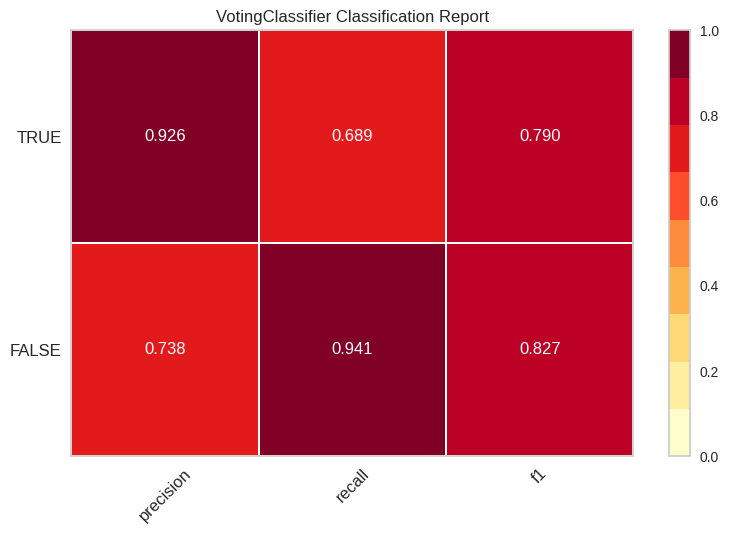

<Axes: title={'center': 'VotingClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(ensemble, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show()

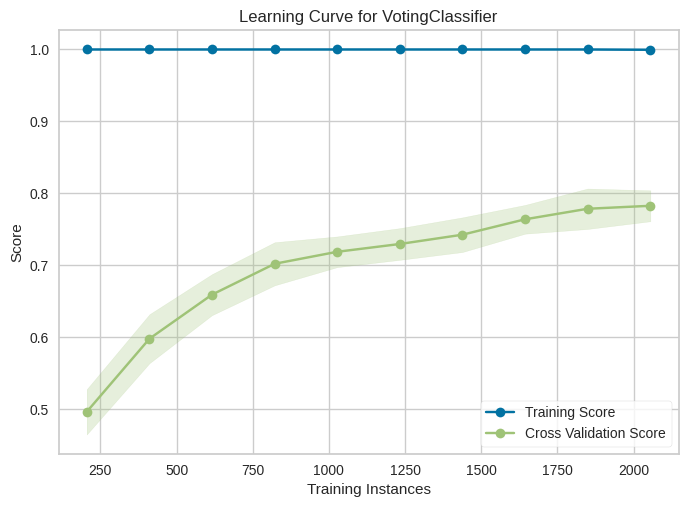

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    ensemble, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train, y_train)
lc_viz.show()